In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import MarkerCluster
import webbrowser

In [5]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\New folder\\Airbnb_Open_Data.csv')
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [6]:
# The df.info() function provides a concise summary of a DataFrame, displaying the following:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Data Cleaning

In [8]:
# Count duplicates
df.duplicated().sum()
# Drop duplicates
df.drop_duplicates(inplace=True)
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [9]:
# Checking for Null Values in Each Columns
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [12]:
# Check for null values in a particular column, e.g., 'price '
df['price'].isnull().sum()

247

In [14]:
# Removing dollar signs and commas from 'price' column and converting to numeric
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
# Removing dollar signs and commas from 'service fee' column and converting to numeric
df['service fee'] = pd.to_numeric(df['service fee'].replace('[\$,]', '', regex=True), errors='coerce')
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [18]:
# columns_to_drop: This is a list of column names that you want to remove from the DataFrame.
# df.drop(columns=columns_to_drop, axis=1): The drop() method removes the columns specified in the columns_to_drop list. 
        # The axis=1 argument indicates that you're dropping columns (not rows).
# df_cleaned: This stores the resulting DataFrame after the specified columns have been dropped.

columns_to_drop = ['license', 'house_rules', 'last review', 'id', 'host id', 'NAME', 'host name']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)
df_cleaned

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,unconfirmed,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,696.0,NaN,7.0,12.0,0.44,5.0,1.0,0.0
102054,verified,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,909.0,NaN,1.0,19.0,0.72,3.0,2.0,0.0
102055,verified,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,387.0,NaN,2.0,50.0,3.12,4.0,2.0,235.0
102056,unconfirmed,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,848.0,NaN,2.0,0.0,NaN,1.0,1.0,0.0


In [20]:
# Fill missing values in specified columns
df_cleaned['reviews per month'].fillna(0, inplace=True)
df_cleaned['host_identity_verified'].fillna('Unknown', inplace=True)
df_cleaned['neighbourhood group'].fillna('Unknown', inplace=True)
df_cleaned

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,Unknown,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,unconfirmed,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,696.0,NaN,7.0,12.0,0.44,5.0,1.0,0.0
102054,verified,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,909.0,NaN,1.0,19.0,0.72,3.0,2.0,0.0
102055,verified,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,387.0,NaN,2.0,50.0,3.12,4.0,2.0,235.0
102056,unconfirmed,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,848.0,NaN,2.0,0.0,0.00,1.0,1.0,0.0


In [24]:
df.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102050.000000,102050.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,40.728097,-73.949652,2012.488090,625.355580,125.039249,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,0.055852,0.049502,5.765838,331.672649,66.325905,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688730,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [25]:
# df.describe()
# Generating descriptive statistics for the numeric columns in df_cleaned
df_cleaned.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102050.000000,102050.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,102058.000000,101739.000000,101739.000000,101610.000000
mean,40.728097,-73.949652,2012.488090,625.355580,125.039249,8.126640,27.517948,1.162233,3.278733,7.936937,141.043992
std,0.055852,0.049502,5.765838,331.672649,66.325905,30.616698,49.571744,1.682184,1.285089,32.266355,135.429156
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.000000,1.000000,1.000000,-10.000000
25%,40.688730,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.090000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,31.000000,1.710000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [27]:
df.columns

Index(['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'lat',
       'long', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

# Theme Setting

In [28]:

sns.set_theme(style="whitegrid")



# Data Visualization




1. Reviews Per Month

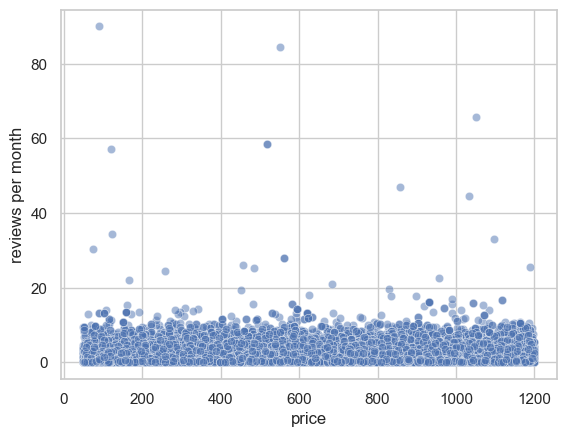

In [35]:
sns.set_theme(style="whitegrid")
# Scatter plot with 'price' on the x-axis and 'reviews per month' on the y-axis
# The viridis color palette will color the points based on their density and distribution.
 # semi-transparent effect (alpha=0.5) 
sns.scatterplot(data=df, x="price", y="reviews per month", alpha=0.5, palette="viridis")
plt.show()

#### Observation:

The scatterplot shows that the majority of listings with higher reviews per month are concentrated in the lower to mid-price range, while expensive listings tend to have fewer reviews per month.

#### Conclusion

There is an inverse relationship between price and review activity: more affordable listings attract higher customer engagement, whereas premium-priced listings are less frequently reviewed.

#### Plot All Types of Room

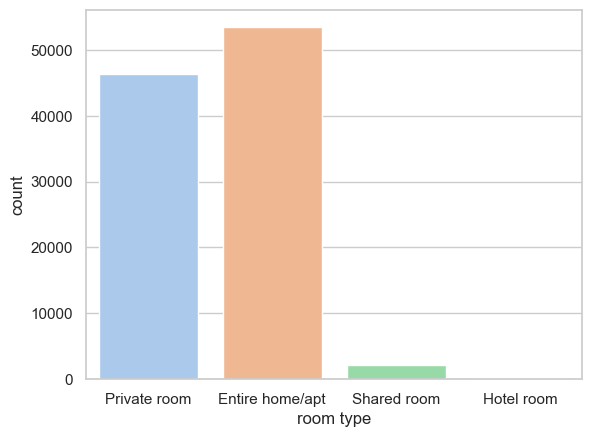

In [38]:
# Create a count plot for the 'room type' column using the 'pastel' palette
sns.countplot(data=df, x="room type", palette="pastel")
plt.show()

Observation:

The countplot reveals that certain room types, such as "Entire home/apt," are significantly more common, while others, like "Shared room," are much less frequent.

Conclusion:

"Entire home/apt" is the most popular room type, indicating a preference among users for complete privacy, while "Shared room" is the least preferred, likely due to its shared nature and limited privacy.

#### Relationship Between Room Type and Availability of Room

sns.barplot(): This function creates a bar plot, where:

data=df: The data for the plot comes from the df DataFrame.

x="room type": The x-axis represents different categories in the room type column.
    
y="availability 365": The y-axis represents the values of availability 365 for each room type.
                                                                          
estimator="mean": The estimator function is set to "mean", meaning that the bar heights will represent the average 
                                value of availability 365 for each room type.
                                                         
ci=None: This disables the confidence interval for the bars, meaning the plot will show only the mean without any error bars.
                                     
palette="rocket": The "rocket" color palette is applied to color the bars. It's a gradient color palette ranging from a dark red to a light orange.
    
hue="neighbourhood group": The hue argument splits the bars by the neighbourhood group column, meaning different 
                            neighborhoods will have differently colored bars within the same room type category.

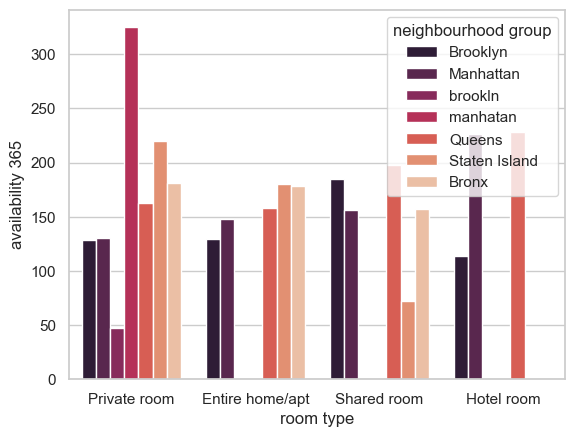

In [40]:
# Create a bar plot for 'room type' vs 'availability 365' with hue as 'neighbourhood group'
sns.barplot(data=df, x="room type", y="availability 365", estimator="mean", ci=None, palette="rocket",hue="neighbourhood group")
plt.show()

Observation:

The barplot shows that the average availability of room types varies significantly across different neighborhood groups. For example, "Entire home/apt" may have higher availability in some neighborhoods, while "Shared room" might have the lowest availability overall.

Conclusion:

The availability of room types is influenced by the neighborhood group. Some room types, like "Entire home/apt," are more consistently available throughout the year in specific neighborhoods, indicating demand patterns linked to location and room type preferences

#### Cancellation Policy and Price

Explanation of the Code:
sns.boxplot(): This function creates a box plot, which is used to visualize the distribution of a continuous
                variable (in this case, price) across different categories (here, cancellation_policy).

data=df: The data is taken from the df DataFrame.
    
x="cancellation_policy": The x-axis represents the different categories of cancellation policies.
    
y="price": The y-axis represents the price values, showing the distribution of prices for each cancellation_policy.

palette="Set1": The color palette used for the plot is "Set1", which is a predefined palette of colors that is often used for categorical variables.


What does a box plot show?
Box: The box represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles of the data.
Whiskers: The lines extending from the box show the range of the data, excluding outliers.
Outliers: Points outside of the whiskers are considered outliers and are plotted as individual points.
Median Line: A line within the box shows the median value of the data.

Why use palette="Set1"?
Set1 is a categorical color palette in Seaborn that uses distinct, vibrant colors, making it easier to distinguish between different categories (in this case, different cancellation policies).
It is a suitable palette for categorical data when you want the categories to be easily identifiable.

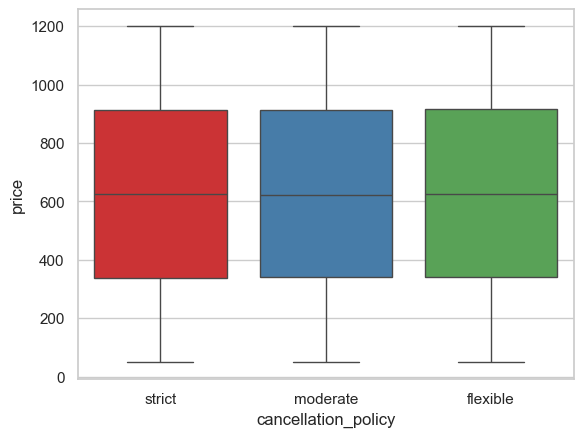

In [42]:
# Create a box plot for 'cancellation_policy' vs 'price' with the 'Set1' color palette
sns.boxplot(data=df, x="cancellation_policy", y="price", palette="Set1")
plt.show()

Observation:

The boxplot reveals that listings with more flexible cancellation policies tend to have lower median prices, while stricter cancellation policies are associated with higher-priced listings. Additionally, strict policies often exhibit greater price variability

Conclusion:

Stricter cancellation policies are typically linked to higher-priced listings, likely reflecting the premium nature of such offerings, while flexible policies are more common among lower-priced, budget-friendly listings.

### Map of Service Fees

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

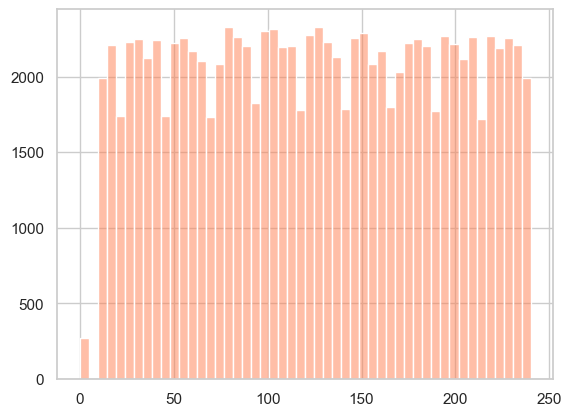

In [57]:
# Assuming df is already cleaned and the 'service fee' column is numeric:
sns.histplot(data=df, x="service fee", bins=50, kde=True, color="coral")
plt.show()

#### Impact of Number of Reviews on Price

data=df: Uses the df DataFrame for the plot.
    
x="number of reviews": Plots the number of reviews column on the x-axis.

y="price": Plots the price column on the y-axis.

alpha=0.5: Sets the transparency of the points to 50%. This allows overlapping points to be visible.
    
color="teal": Sets the color of the scatter points to teal.

<AxesSubplot:xlabel='number of reviews', ylabel='price'>

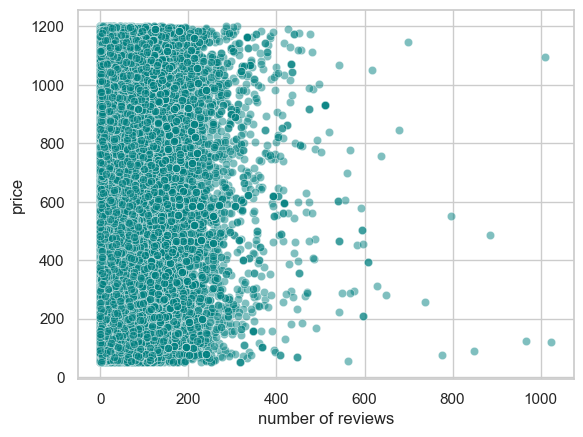

In [58]:
sns.scatterplot(data=df, x="number of reviews", y="price", alpha=0.5, color="teal")

Observation:

The scatterplot indicates that listings with a higher number of reviews tend to have lower prices, while listings with higher prices generally receive fewer reviews. A dense cluster of points appears in the low-price and high-review range

Conclusion:

Affordable listings attract more reviews, suggesting they are more popular among users, while expensive listings are reviewed less frequently, potentially due to limited accessibility or niche appeal

#### Frequency Distribution and Density of Number of Reviews

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

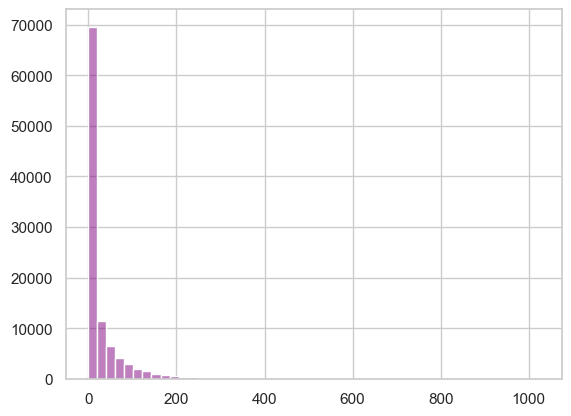

In [61]:
sns.histplot(data=df, x="number of reviews", bins=50, kde=True, color="purple")
plt.show()

Observation:

The histogram shows that the majority of listings have a low number of reviews, with the frequency sharply declining as the number of reviews increases. The KDE curve further highlights this skewed distribution, with a long tail extending towards higher review counts

Conclusion:

Most listings receive only a small number of reviews, indicating limited user interaction for the majority of properties, while a few popular listings garner significantly higher review counts, reflecting their popularity or frequent bookings

#### Relationship Between Room Type and Service Fee

x="room type": Plots the room type on the x-axis.

y="service fee": Plots the service fee on the y-axis.

data=df: Specifies that the plot uses the df DataFrame.

palette="plasma": Sets the color palette for the plot to plasma, a vibrant color palette.

inner="quartile": Displays the quartiles of the data within the violin plot.

linewidth=4: Sets the width of the lines around the violins to 4, making them more prominent.

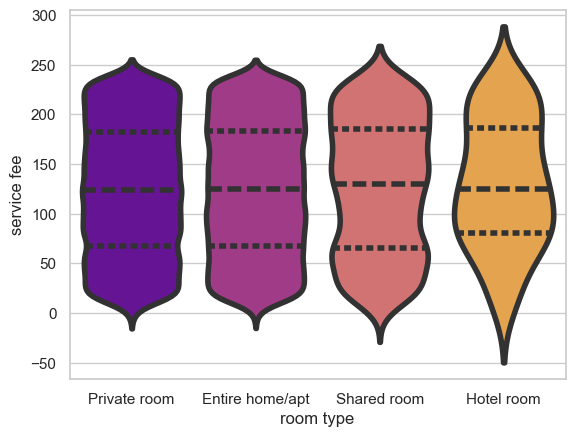

In [62]:
sns.violinplot(x="room type", y="service fee", data=df, palette="plasma", inner="quartile",linewidth=4)
plt.show()

Observation:

The violin plot shows that the distribution of service fees varies by room type. "Entire home/apt" generally has the highest median service fee and a broader range, while "Shared room" has the lowest service fees with a narrower distribution. Quartile lines indicate where most values are concentrated within each room type.

Conclusion:

Service fees are highest for "Entire home/apt" due to its premium nature, while "Shared room" has the lowest fees, reflecting its budget-friendly appeal. This suggests that service fees are proportional to the exclusivity and privacy offered by the room type.

#### Geographic Distribution of Listings by Availability

x=df['long']: Plots the longitude data on the x-axis.

y=df['lat']: Plots the latitude data on the y-axis.

hue=df['availability 365']: Colors the points based on the availability 365 column, which indicates the availability for each property.

palette="viridis": Uses the viridis color palette to represent the values of availability 365 in the scatter plot.
plt.show(): Displays the plot.


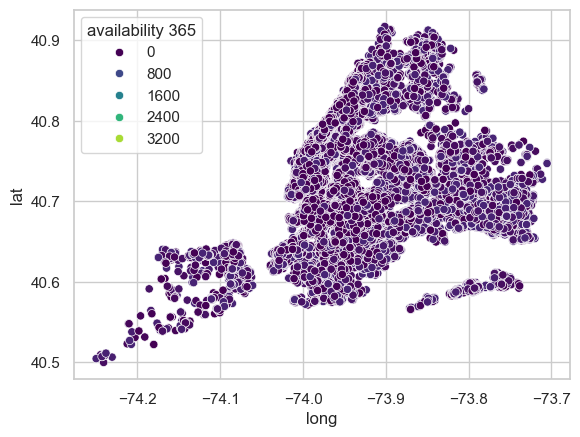

In [63]:
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['availability 365'],palette="viridis")
plt.show()

Observation:

The scatterplot shows the geographic distribution of listings based on longitude and latitude, with the color indicating the availability (number of days available per year). Areas with more vibrant colors (indicating higher availability) are clustered in certain regions, while areas with lower availability (fainter colors) are scattered more evenly.

Conclusion:

Listings with higher availability are concentrated in specific areas, suggesting that certain regions have more properties that are consistently available throughout the year. In contrast, areas with lower availability may indicate more seasonal or niche listings.

#### Distribution of Prices Across Listings

1 plt.hist(df['price'], bins=50, color='blue', alpha=0.7):
    Creates a histogram of the price column from the DataFrame.
    The histogram will have 50 bins, with a blue color and 70% transparency (alpha=0.7).

2 plt.title("Price Distribution"):
    Adds a title to the histogram.

3 plt.xlabel("Price ($)"):
    Labels the x-axis as "Price ($)".

4 plt.ylabel("Frequency"):
    Labels the y-axis as "Frequency".

5 plt.yscale('log'):
    Applies a logarithmic scale to the y-axis. This is useful if the frequency of prices varies greatly, as it compresses large values while keeping smaller ones visible.

6 plt.show():
    Displays the plot.

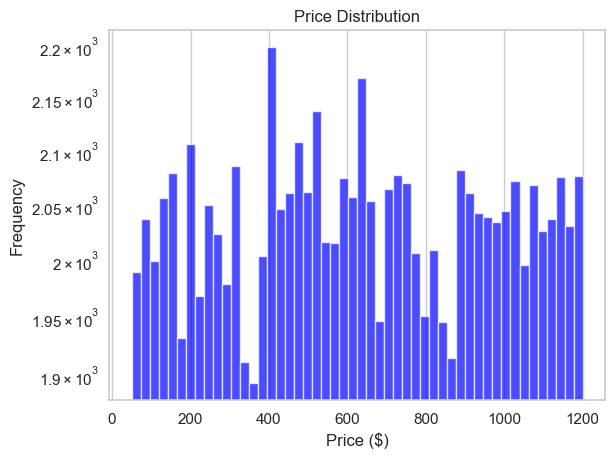

In [66]:
plt.hist(df['price'], bins=50, color='blue', alpha=0.7)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.yscale('log')  # Optional log scale
plt.show()

Observation:

The price distribution is heavily skewed, with most listings priced low and fewer high-priced listings, visible through the log scale.

Conclusion:

Most listings are affordable, while high-priced listings are rare

#### Number of Listings by Neighbourhood Group

Explanation:
1 neighbourhood_group_counts = df['neighbourhood group'].value_counts():
    This calculates the frequency (count) of each unique value in the 'neighbourhood group' column.

2 plt.bar(neighbourhood_group_counts.index, neighbourhood_group_counts.values, color='purple'):
    Creates a bar plot using the counts. The x-axis represents the unique values (neighbourhood groups), and the y-axis represents the count of listings in each neighbourhood group.
    The bars will be purple.

3 plt.title("Listings by Neighbourhood Group"):
    Adds the title to the plot.

4 plt.xlabel("Neighbourhood Group"):
    Labels the x-axis as "Neighbourhood Group".

5 plt.ylabel("Count"):
    Labels the y-axis as "Count".

6 plt.show():
    Displays the plot.

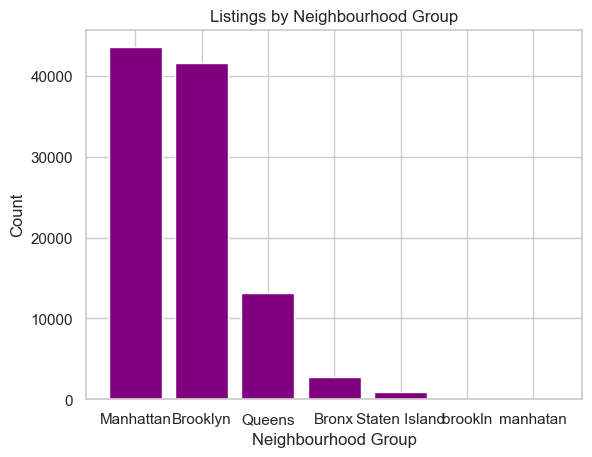

In [67]:
neighbourhood_group_counts = df['neighbourhood group'].value_counts()
plt.bar(neighbourhood_group_counts.index, neighbourhood_group_counts.values, color='purple')
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

Observation:

The bar chart shows the number of listings in each neighborhood group, with certain groups having a significantly higher count of listings than others

Conclusion:

Some neighborhood groups have a much higher number of listings, indicating higher demand or more available properties in those areas, while other groups have fewer listings, suggesting either lower demand or less availability.

#### Average Days of Availability Across Neighbourhood Groups

Explanation:
1 avg_availability = df.groupby("neighbourhood group")['availability 365'].mean():
    Groups the DataFrame by the 'neighbourhood group' column and calculates the mean (average) of the 'availability 365' column for each neighbourhood group.

2 plt.barh(avg_availability.index, avg_availability.values, color='brown'):
    Creates a horizontal bar plot where:
    The y-axis represents the neighbourhood groups.
    The x-axis represents the average availability (in days).
    The bars will be brown.

3 plt.title("Average Availability by Neighbourhood Group"):
    Adds a title to the plot.

4 plt.xlabel("Average Availability (Days)"):
    Labels the x-axis as "Average Availability (Days)".

5 plt.ylabel("Neighbourhood Group"):
    Labels the y-axis as "Neighbourhood Group".

6 plt.show():
    Displays the plot.

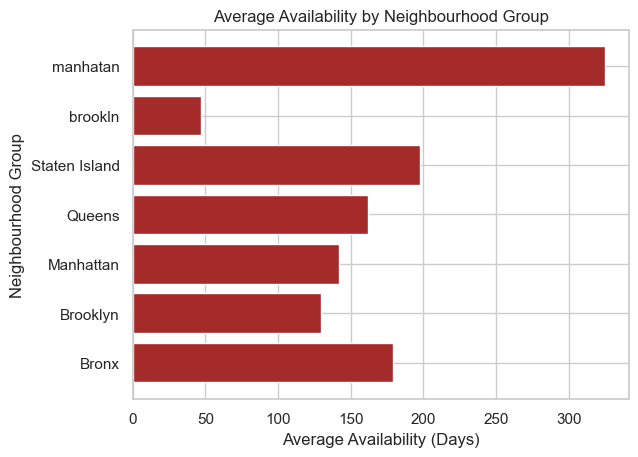

In [68]:
avg_availability = df.groupby("neighbourhood group")['availability 365'].mean()
plt.barh(avg_availability.index, avg_availability.values, color='brown')
plt.title("Average Availability by Neighbourhood Group")
plt.xlabel("Average Availability (Days)")
plt.ylabel("Neighbourhood Group")
plt.show()

Observation:

The horizontal bar chart shows the average availability of listings across different neighborhood groups, with some groups having significantly higher average availability than others.

Conclusion:

Certain neighborhood groups have listings that are available more frequently throughout the year, while others have lower average availability, indicating differences in demand or property usage.

#### Location of Listings Across Neighborhood Groups

Explanation:
1 plt.figure(figsize=(10,6)):
    This sets the figure size to 10 inches by 6 inches to give more space for the plot.

2 sns.scatterplot(x='long', y='lat', hue='neighbourhood group', data=df):
    This creates a scatter plot using Seaborn where:
    The x-axis represents the longitude ('long').
    The y-axis represents the latitude ('lat').
    The hue='neighbourhood group' argument will color the points based on the neighbourhood group column, allowing you to see
    how the different neighbourhood groups are distributed geographically.
    
3 plt.show():
    This displays the plot.

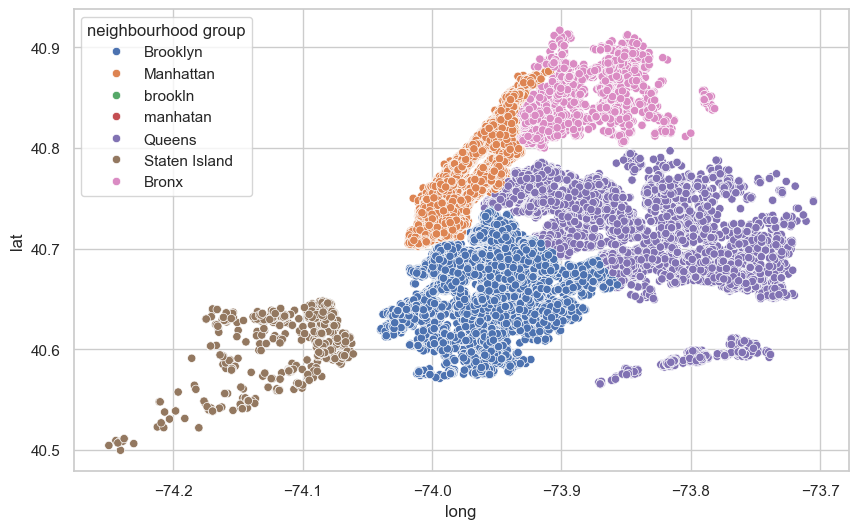

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='neighbourhood group', data=df)
plt.show()

Observation:

The scatterplot reveals geographic clustering of listings, with some neighborhood groups having higher concentrations.

Conclusion:

This indicates that certain areas are more densely populated with properties, reflecting higher demand in those regions

#### Spatial Spread of Room Types Across Locations

Explanation:
1 plt.figure(figsize=(10,6)):
    Adjusts the figure size for better visibility of the plot.
        
2 sns.scatterplot(x='long', y='lat', hue='room type', data=df, palette="plasma", alpha=0.5):
    Creates a scatter plot:
    The x-axis represents longitude ('long').
    The y-axis represents latitude ('lat').
    hue='room type': Colors the points based on the room type column.
    palette="plasma": Uses the "plasma" color palette for coloring the points.
    alpha=0.5: Adds transparency to the points, making them semi-transparent (useful when points overlap).

3 plt.show():
    Displays the plot.

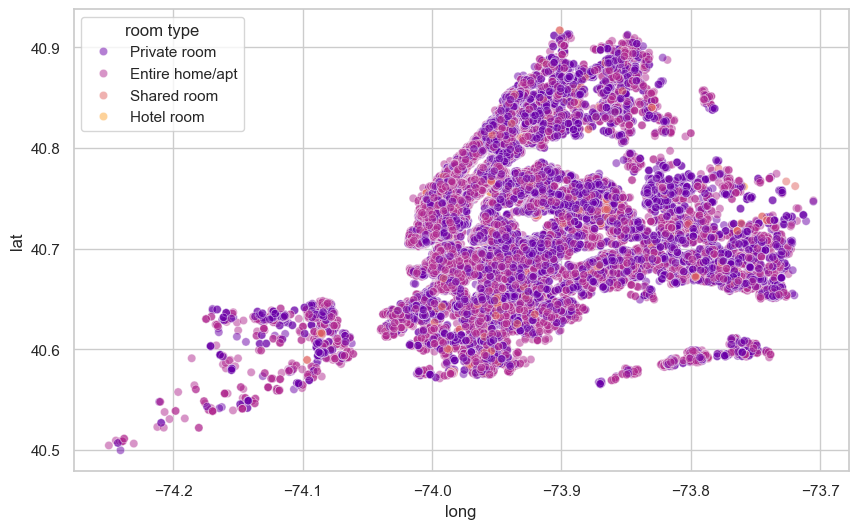

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='room type', data=df,palette="plasma",alpha=0.5)
plt.show()

Observation:

The scatterplot illustrates the geographic spread of df listings, with room types differentiated by color. Certain regions show clear clusters for specific room types, indicating location-based preferences

Conclusion:

Different room types are unevenly distributed across locations, suggesting that some neighborhoods are more suited for entire homes or apartments, while others are more focused on private or shared rooms, likely due to factors like price, demand, and area characteristics.